# GradientBoosting

In [2]:
import matplotlib
#np.warnings.filterwarnings('ignore')
from preprocessing import *
from aux import *
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier

sns.set()

df_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1i-KJ2lSvM7OQH0Yd59bX01VoZcq8Sglq')
df_decision = pd.read_csv('https://drive.google.com/uc?export=download&id=1km-AEIMnWVGqMtK-W28n59hqS5Kufhd0')

## Preprocesado 1

In [3]:
columnillas = ['tipo_de_sala_4d', 'tipo_de_sala_normal', 'tipo_de_sala_nan', 'id_usuario', 'genero_mujer', 'genero_nan', 
              'edad', 'amigos', 'parientes', 'precio_ticket', 
              'nombre_sede_fiumark_palermo', 'nombre_sede_fiumark_quilmes', 'nombre_sede_nan', 
              'cant_acompañantes']

In [4]:
def preprocesado_1(dataset, columnas):
    df = eliminar_features_que_no_aportan_info(dataset, True)
    df = crear_feature_acompañantes(df)
    df = replace_nulls_column(df, 'edad', 'media')
    df = encodear_atributos_categoricos(df)
    df = df.reindex(columns = columnas)
    return df

In [5]:
volver = ['volveria']
columnas = columnillas + volver

In [6]:
dataset = pd.merge(df_data, df_decision, how='inner', left_on='id_usuario', right_on='id_usuario')

df = preprocesado_1(dataset, columnas)

df.head()

,tipo_de_sala_4d,tipo_de_sala_normal,tipo_de_sala_nan,id_usuario,genero_mujer,genero_nan,edad,amigos,parientes,precio_ticket,nombre_sede_fiumark_palermo,nombre_sede_fiumark_quilmes,nombre_sede_nan,cant_acompañantes,volveria
0,1,0,0,117,0,0,73.5,0,0,1,0,1,0,0,0
1,1,0,0,658,1,0,35.0,1,1,2,0,1,0,2,0
2,0,1,0,794,0,0,32.7,0,0,3,0,0,0,0,0
3,1,0,0,455,0,0,32.7,0,0,1,1,0,0,0,0
4,1,0,0,173,1,0,4.0,1,1,2,1,0,0,2,1


In [7]:
df.shape

(801, 15)

## Entrenamiento

In [10]:
X, y = split_dataset_X_y(df, columnillas)

params = {'min_samples_split': np.arange(2, 16), 
          'max_depth': np.arange(1, 35),
          'n_estimators': np.arange(75, 125),
          'learning_rate': [0.1, 0.2, 0.4, 0.7],
          'criterion': ['friedman_mse', 'mse', 'mae'],
          'loss': ['deviance', 'exponential'],
         }

model_boosting = GradientBoostingClassifier(random_state=117)

best_params, X_train, X_test, y_train, y_test = fit_model_random_grid_search (X, y, model_boosting, params)

boosting = GradientBoostingClassifier(
    random_state=117,
    n_estimators = best_params['n_estimators'],
    min_samples_split = best_params['min_samples_split'],
    max_depth = best_params['max_depth'],
    loss = best_params['loss'],
    learning_rate = best_params['learning_rate'],
    criterion = best_params['criterion'],
)

boosting = apply_stratified_k_fold(X, y, boosting)

X.shape:  (801, 14)
y.shape:  (801,) 

Best score: 0.8519473207065872
Best params {'n_estimators': 108, 'min_samples_split': 10, 'max_depth': 2, 'loss': 'exponential', 'learning_rate': 0.4, 'criterion': 'mse'}

Fold 0: AUC ROC score is 0.7539
Fold 1: AUC ROC score is 0.7319
Fold 2: AUC ROC score is 0.8234
Fold 3: AUC ROC score is 0.7793
Fold 4: AUC ROC score is 0.7592
Mean test AUC ROC is: 0.7695


## Métricas

In [11]:
scores = get_scores(boosting, X_test, y_test)

AUC ROC : 0.9483
Accuracy : 0.9055
Precision : 0.8873
Recall : 0.9370
F1-Score : 0.8690


### Matriz de confusión

/home/anarella/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


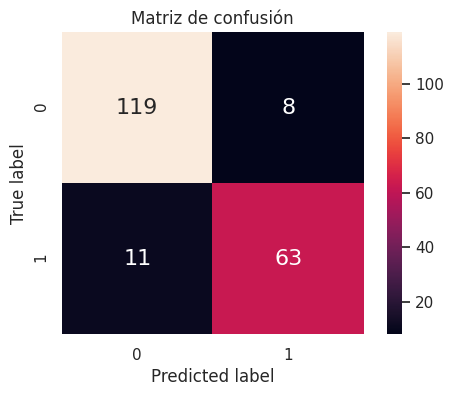

In [12]:
plot_confusion_matrix(y_test, boosting.predict(X_test))

## Test Holdout

In [13]:
holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')

In [14]:
df_h = preprocesado_1(holdout, columnillas)
df_h.head()

,tipo_de_sala_4d,tipo_de_sala_normal,tipo_de_sala_nan,id_usuario,genero_mujer,genero_nan,edad,amigos,parientes,precio_ticket,nombre_sede_fiumark_palermo,nombre_sede_fiumark_quilmes,nombre_sede_nan,cant_acompañantes
0,1,0,0,650,1,0,26.0,0,0,1,1,0,0,0
1,1,0,0,234,1,0,8.0,4,2,4,1,0,0,6
2,0,1,0,31,0,0,43.0,0,0,3,0,0,0,0
3,0,0,0,552,0,0,30.0,0,0,3,1,0,0,0
4,1,0,0,411,0,0,32.8,0,0,1,1,0,0,0


In [15]:
df_resultado = evaluate_holdout(holdout, df_h, boosting)
df_resultado.head(15)

y_pred.shape:  (90,)
holdout_df.shape:  (90, 14) 



,id_usuario,volveria
0,650,0
1,234,0
2,31,1
3,552,0
4,411,0
5,134,1
6,497,1
7,434,0
8,528,0
9,112,1


In [16]:
df_resultado.to_csv('prediccion/Boosting_resultado_final.csv')

## Preprocesado 2

In [28]:
columnas_2 = ['tipo_de_sala_4d', 'tipo_de_sala_normal', 'tipo_de_sala_nan', 'id_usuario', 'genero_mujer', 'genero_nan', 
              'edad',
              'precio_ticket',
              'nombre_sede_fiumark_palermo', 'nombre_sede_fiumark_quilmes', 'nombre_sede_nan', 
              'cant_acompañantes']

In [35]:
def preprocesado_2(dataset, columnas):
    df = eliminar_features_que_no_aportan_info(dataset, True)
    df = crear_feature_acompañantes(df)
    df = replace_nulls_column(df, 'edad', 'media')
    df = encodear_atributos_categoricos(df)
    df = normalizar_atributos_numericos(df)
    df = df.reindex(columns = columnas)
    return df

In [36]:
df_2 = preprocesado_2(dataset, columnas_2+volver)

df_2.head()

,tipo_de_sala_4d,tipo_de_sala_normal,tipo_de_sala_nan,id_usuario,genero_mujer,genero_nan,edad,precio_ticket,nombre_sede_fiumark_palermo,nombre_sede_fiumark_quilmes,nombre_sede_nan,cant_acompañantes,volveria
0,1,0,0,0.130337,0,0,0.880653,0.000000,0,1,0,0.0,0.0
1,1,0,0,0.738202,1,0,0.396985,0.020408,0,1,0,0.2,0.0
2,0,1,0,0.891011,0,0,0.368090,0.040816,0,0,0,0.0,0.0
3,1,0,0,0.510112,0,0,0.368090,0.000000,1,0,0,0.0,0.0
4,1,0,0,0.193258,1,0,0.007538,0.020408,1,0,0,0.2,1.0


In [37]:
df_2.shape

(801, 13)

# Entrenamiento

In [38]:
X_2, y_2 = split_dataset_X_y(df_2, columnas_2)

model_boosting = GradientBoostingClassifier(random_state=117)

best_params_2, X_train_2, X_test_2, y_train_2, y_test_2 = fit_model_random_grid_search (X_2, y_2, model_boosting,
                                                                                        params)

boosting_2 = GradientBoostingClassifier(
    random_state=117,
    n_estimators = best_params_2['n_estimators'],
    min_samples_split = best_params_2['min_samples_split'],
    max_depth = best_params_2['max_depth'],
    loss = best_params_2['loss'],
    learning_rate = best_params_2['learning_rate'],
    criterion = best_params_2['criterion'],
)

boosting_2 = apply_stratified_k_fold(X_2, y_2, boosting_2)

X.shape:  (801, 12)
y.shape:  (801,) 

Best score: 0.8492071494403175
Best params {'n_estimators': 118, 'min_samples_split': 14, 'max_depth': 11, 'loss': 'deviance', 'learning_rate': 0.7, 'criterion': 'friedman_mse'}

Fold 0: AUC ROC score is 0.7418
Fold 1: AUC ROC score is 0.7666
Fold 2: AUC ROC score is 0.8164
Fold 3: AUC ROC score is 0.7736
Fold 4: AUC ROC score is 0.7936
Mean test AUC ROC is: 0.7784


## Métricas

In [39]:
scores_2 = get_scores(boosting_2, X_test_2, y_test_2)

AUC ROC : 0.9760
Accuracy : 0.9701
Precision : 0.9857
Recall : 0.9921
F1-Score : 0.9583


### Matriz de confusión

/home/anarella/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0.0, 1.0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


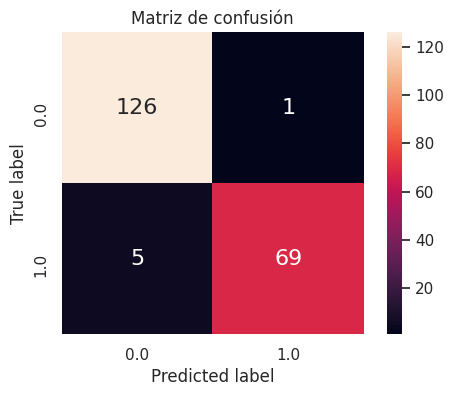

In [42]:
plot_confusion_matrix(y_test_2, boosting_2.predict(X_test_2))

## Test Holdout

In [43]:
df_h_2 = preprocesado_2(holdout, columnas_2)
df_h_2.head()

,tipo_de_sala_4d,tipo_de_sala_normal,tipo_de_sala_nan,id_usuario,genero_mujer,genero_nan,edad,precio_ticket,nombre_sede_fiumark_palermo,nombre_sede_fiumark_quilmes,nombre_sede_nan,cant_acompañantes
0,1,0,0,0.751756,1,0,0.344774,0.000000,1,0,0,0.0
1,1,0,0,0.264637,1,0,0.063963,0.061224,1,0,0,0.6
2,0,1,0,0.026932,0,0,0.609984,0.040816,0,0,0,0.0
3,0,0,0,0.637002,0,0,0.407176,0.040816,1,0,0,0.0
4,1,0,0,0.471897,0,0,0.450858,0.000000,1,0,0,0.0


In [44]:
df_resultado_2 = evaluate_holdout(holdout, df_h_2, boosting_2)
df_resultado_2.head(15)

y_pred.shape:  (90,)
holdout_df.shape:  (90, 12) 



,id_usuario,volveria
0,650,0
1,234,0
2,31,1
3,552,0
4,411,0
5,134,1
6,497,1
7,434,0
8,528,0
9,112,0


In [45]:
df_resultado_2.to_csv('prediccion/Boosting_2do_prepoc_resultado_final.csv')